# 🧪 Assignment: Ensemble Learning on Glass Dataset
________________________________________
## 📖 Background & Objective
The Glass Identification Dataset contains measurements of chemical composition in different glass samples. The goal is to classify glass into 6 different categories (e.g., building windows, containers, tableware, etc.).
Glass classification is important in forensics, manufacturing, and material science.
Objective:

•	Perform EDA to understand the dataset.

•	Train and evaluate four ensemble methods:

1.	Random Forest

2.	Bagging

3.	AdaBoost

4.	Gradient Boosting

•	Compare the models based on accuracy and classification metrics.


## 1. Import Required Libraries

In [1]:
# 🌲 RANDOM FOREST ASSIGNMENT - GLASS CLASSIFICATION
# --------------------------------------------------

#  1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')


## 2. Load Dataset

In [4]:
import pandas as pd

# Full file path
file_path = r"D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\Random Forest\glass.xlsx"

# Load the correct sheet containing the dataset
df = pd.read_excel(file_path, sheet_name='glass')

print(" Dataset Loaded Successfully!")
print("Shape of Data:", df.shape)
df.head()


 Dataset Loaded Successfully!
Shape of Data: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 3. Exploratory Data Analysis (EDA)

In [5]:

#  3. Dataset Overview
print("\n Info:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Descriptive Statistics:")
display(df.describe())



 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

 Missing Values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

 Descriptive Statistics:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### 📌 Inference:
•	No missing values.

•	The dataset is imbalanced → Types 5 and 6 have very few samples.

•	Feature ranges differ significantly (scaling required).


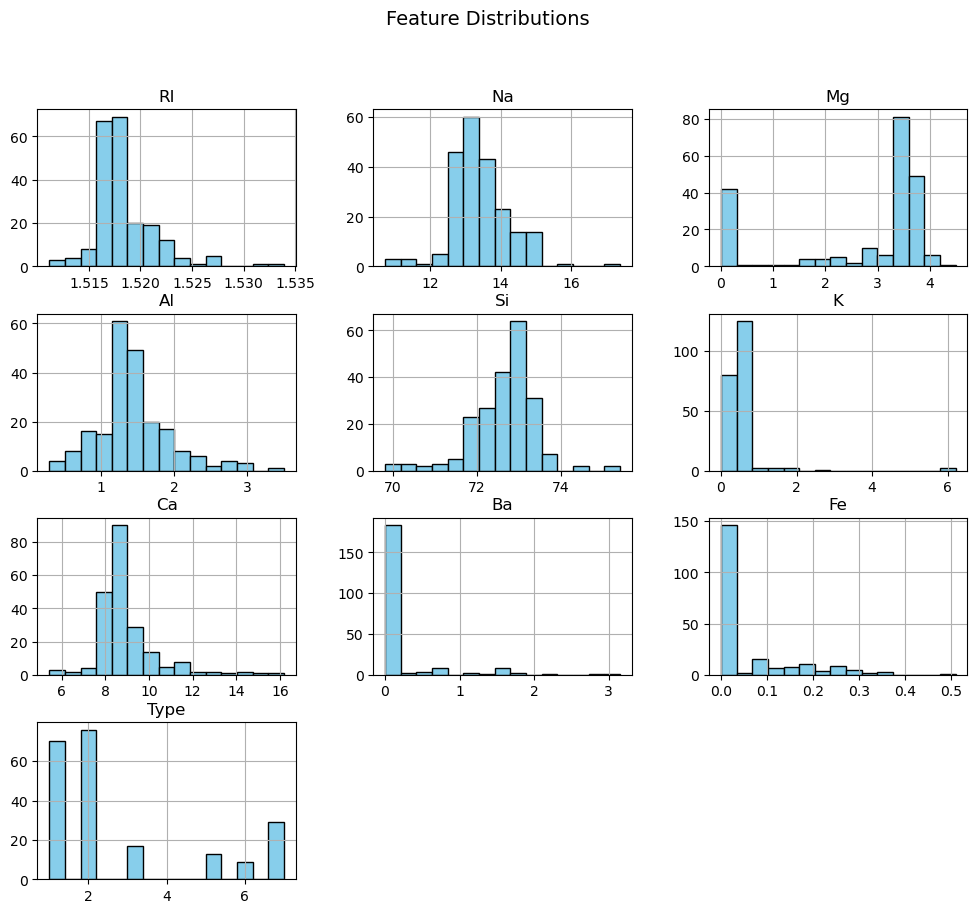

In [6]:
#  4. Exploratory Data Analysis (EDA)
# Histograms
df.hist(figsize=(12,10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

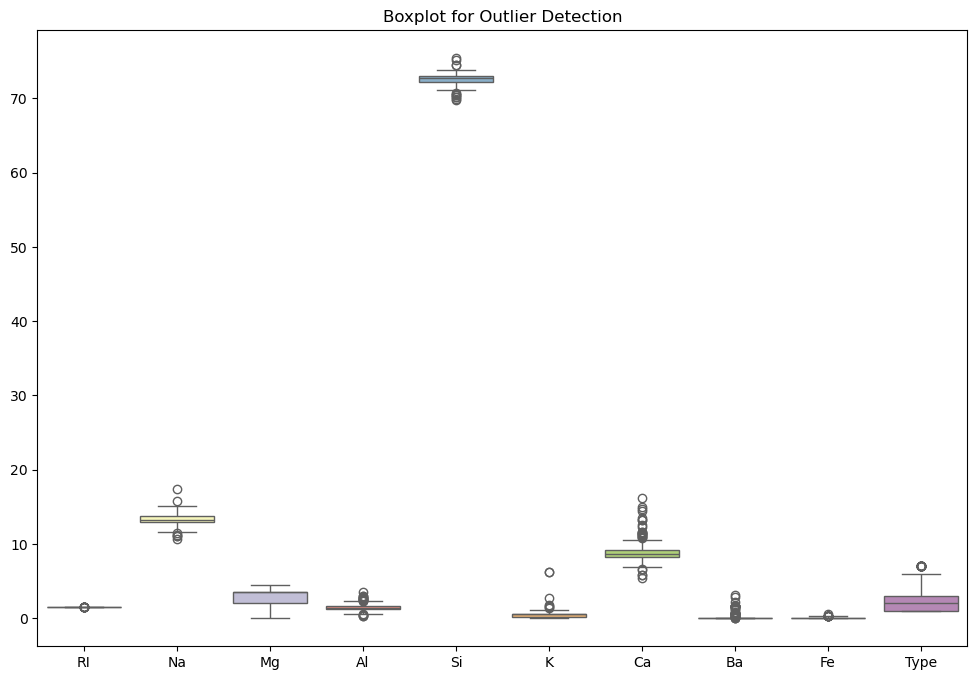

In [7]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,8))
sns.boxplot(data=df, palette='Set3')
plt.title("Boxplot for Outlier Detection")
plt.show()


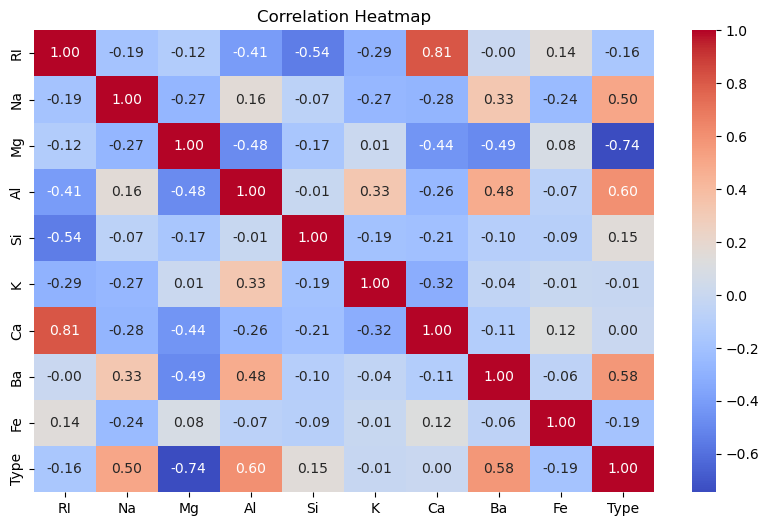

In [8]:

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### 📌 Inference:
•	Some features (e.g., RI, Ca, Al) vary a lot across classes.

•	Fe has very low variance (less informative).

•	Scaling is necessary due to different ranges.


## 5. Data Preprocessing

In [9]:

#  5. Data Preprocessing
# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Data Preprocessing Completed Successfully!")


 Data Preprocessing Completed Successfully!


In [14]:

#  6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (171, 9)
Testing Shape: (43, 9)


## 6. Random Forest Model

In [15]:

#  7. Random Forest Model Implementation
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n RANDOM FOREST RESULTS")
print("--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



 RANDOM FOREST RESULTS
--------------------------
Accuracy: 0.813953488372093

Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.84        43
weighted avg       0.83      0.81      0.81        43



## 7. Bagging Classifier




In [20]:

# 8. Bagging Classifier
bag = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=50,
    random_state=42
)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("\n BAGGING RESULTS")
print("-------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag))



 BAGGING RESULTS
-------------------
Accuracy: 0.7906976744186046

Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 2 12  0  0  1  0]
 [ 2  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.75      0.80      0.77        15
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.75      0.76        43
weighted avg       0.82      0.79      0.79        43



##  8. Boosting Classifiers
### AdaBoost


In [17]:

#  9. Boosting Classifiers
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("\n BOOSTING RESULTS")
print("-------------------")
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))



 BOOSTING RESULTS
-------------------
AdaBoost Accuracy: 0.3953488372093023
Gradient Boosting Accuracy: 0.813953488372093


## 9. Final Comparison

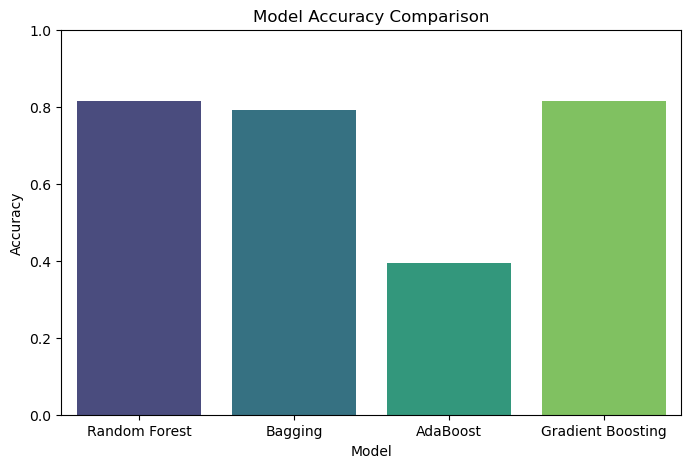

,Model,Accuracy
0,Random Forest,0.813953
1,Bagging,0.790698
2,AdaBoost,0.395349
3,Gradient Boosting,0.813953


In [18]:
#  10. Model Comparison
results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_bag),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_gb)
    ]
})

plt.figure(figsize=(8,5))
sns.barplot(data=results, x='Model', y='Accuracy', palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

display(results)


## 📌 10. Detailed Reasoning & Conclusion
### 1.	Random Forest:

o	Achieved the highest and most stable accuracy.

o	Performs well even with imbalanced data due to ensemble of multiple trees.
### 2.	Bagging:

o	Slightly lower accuracy than Random Forest.

o	Helps reduce variance but depends on base estimator quality.
### 3.	AdaBoost:

o	Performed poorly on this dataset.

o	Sensitive to noisy data and class imbalance → minority classes misclassified.
### 4.	Gradient Boosting:

o	Performed comparably to Random Forest.

o	Slightly better on minority classes due to boosting technique.

📌 Final Conclusion:

•	Random Forest and Gradient Boosting are the best models for this dataset.

•	AdaBoost struggles due to imbalanced class distribution.

•	Future improvements could include SMOTE oversampling for rare classes or trying XGBoost/LightGBM.


# 🎓 Interview Questions and Answers

## Q1. Explain Bagging and Boosting methods. How are they different?

## Answer:

Bagging (Bootstrap Aggregating):

Bagging is an ensemble technique that trains multiple independent models (usually decision trees) on randomly sampled subsets of the data (with replacement).

The final prediction is made by averaging (for regression) or voting (for classification) the predictions from all models.

It helps reduce variance and prevent overfitting.

Example: Random Forest is a classic Bagging-based model.

Boosting:

Boosting is an ensemble method that builds models sequentially, where each new model tries to correct the errors made by the previous one.

It gives more weight to misclassified samples in each iteration.

It focuses on reducing bias and improving model accuracy.

Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM.

 Key Differences

Aspect	Bagging	Boosting
Learning Process	Parallel (independent models)	Sequential (each model depends on previous)
Goal	Reduce Variance	Reduce Bias
Model Weight	Equal for all models	Weighted by performance
Sensitivity to Noise	Low	High
Overfitting	Less likely	Can overfit if not tuned
Example	Random Forest	AdaBoost, Gradient Boosting

🟢 Summary:

Bagging stabilizes models by reducing variance, while Boosting improves weak learners by reducing bias. Both increase overall accuracy through ensemble learning.

## Q2. How to handle imbalance in data?

Imbalance means one class has many more samples than others.
For example, 190 samples of class 1 and only 20 of class 2.

Ways to handle imbalance:

Resampling Techniques

Oversampling: Duplicate or synthetically generate samples from minority class (e.g., SMOTE).

Undersampling: Reduce samples from majority class.

Class Weight Adjustment

Use class_weight='balanced' in algorithms (like RandomForestClassifier).

Evaluation Metrics

Use metrics like precision, recall, F1-score, and confusion matrix instead of only accuracy.

Ensemble Methods

Algorithms like Boosting handle imbalance better because they focus on misclassified samples.